In [9]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

In [10]:
df = pd.read_csv('./analysis/BTC.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [11]:
targets = pd.read_csv('./targets/BTC_targets')
targets.drop(columns='Unnamed: 0',inplace=True)

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


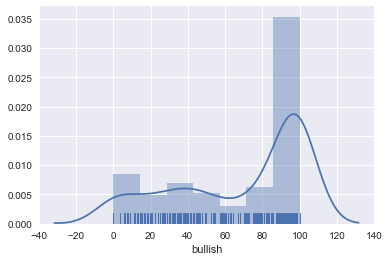

In [16]:
sns.distplot(targets['bullish'], rug=True);

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


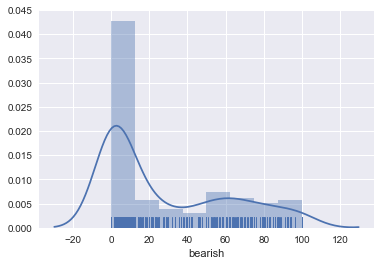

In [18]:
sns.distplot(targets['bearish'], rug=True);

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


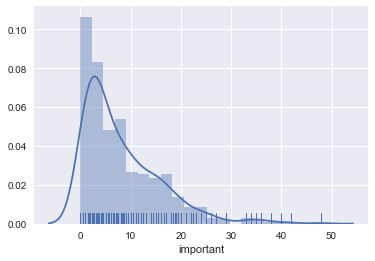

In [19]:
sns.distplot(targets['important'], rug=True);

In [21]:
targets.columns

Index(['dislike', 'important', 'liked', 'lol', 'bearish', 'bullish', 'saved',
       'user_sent_opinions', 'is_toxic'],
      dtype='object')

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


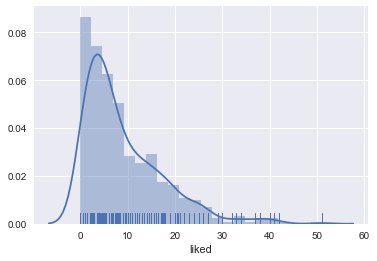

In [22]:
sns.distplot(targets['liked'], rug=True);

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


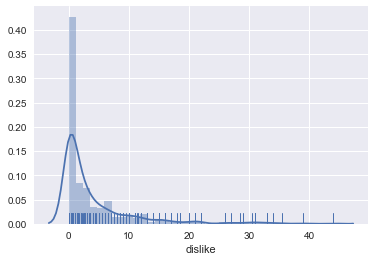

In [24]:
sns.distplot(targets['dislike'], rug=True);

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


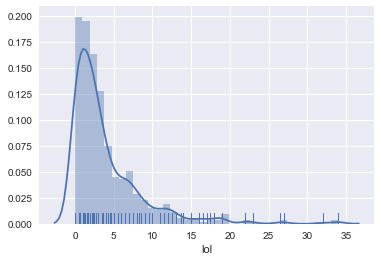

In [25]:
sns.distplot(targets['lol'], rug=True);

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


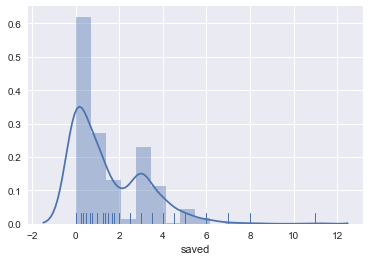

In [26]:
sns.distplot(targets['saved'], rug=True);

/Users/roseporter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


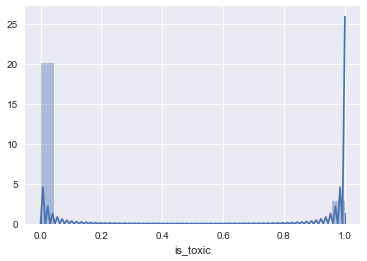

In [27]:
sns.distplot(targets['is_toxic'], rug=True);

In [100]:
cols = ['timestamp', 'title', 'votes_disliked', 'votes_important',
       'votes_liked', 'votes_lol', 'votes_negative', 'votes_positive',
       'votes_saved', 'votes_toxic']

In [101]:
raw = pd.read_csv('./rawCryptoPanicNews/CPNews_BTC.csv', usecols=cols, infer_datetime_format=True)

In [102]:
raw = raw[1:]

In [103]:
raw['timestamp'] = pd.to_datetime(raw['timestamp'])

In [104]:
raw.columns

Index(['timestamp', 'title', 'votes_disliked', 'votes_important',
       'votes_liked', 'votes_lol', 'votes_negative', 'votes_positive',
       'votes_saved', 'votes_toxic'],
      dtype='object')

In [105]:
raw = raw.sort_values(by='timestamp')

In [106]:
raw = raw.set_index(pd.DatetimeIndex(raw['timestamp']))

In [107]:
raw = raw.drop(columns='timestamp')

In [108]:
raw.head()

,title,votes_disliked,votes_important,votes_liked,votes_lol,votes_negative,votes_positive,votes_saved,votes_toxic
timestamp,,,,,,,,,
2018-07-10 15:44:13.195368,Here Is Why Tron’s (TRX) Price Drop Is Only Te...,4.0,2.0,5.0,4.0,4.0,5.0,0.0,1.0
2018-07-10 15:44:13.195368,CBOE Global Markets Files New Bitcoin ETF Lice...,0.0,15.0,20.0,1.0,1.0,21.0,3.0,0.0
2018-07-10 15:44:13.195368,“Buffett Doesn’t Know What He’s Talking About ...,0.0,15.0,17.0,3.0,0.0,23.0,2.0,0.0
2018-07-10 15:44:13.195368,Bank of Korea Says Crypto Investment Poses ‘In...,0.0,17.0,18.0,1.0,0.0,25.0,1.0,0.0
2018-07-10 15:44:13.195368,Privacy-Centric ‘Bob Wallet’ Adds Bitcoin Cash...,4.0,2.0,6.0,1.0,1.0,7.0,1.0,0.0


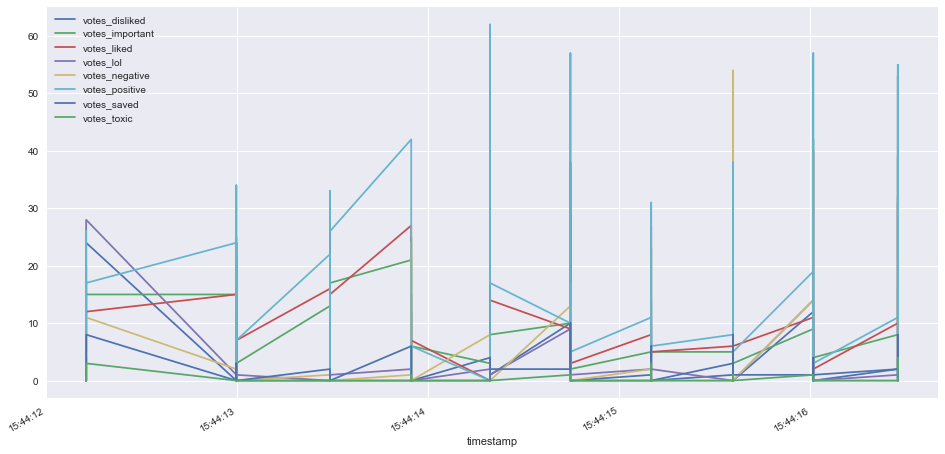

In [111]:
raw.plot(figsize=(16,8));

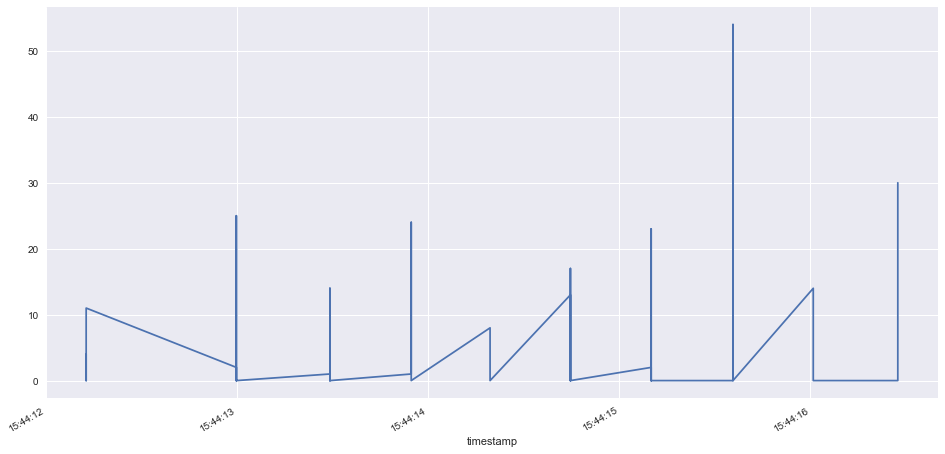

In [95]:
raw['votes_negative'].plot(figsize=(16,8));